In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/Shreyas3108/Titanic-EDA-and-Survival-prediction/master/train.csv", sep = ",")
df_test  =pd.read_csv("https://raw.githubusercontent.com/Shreyas3108/Titanic-EDA-and-Survival-prediction/master/test.csv", sep=",")
df =pd.concat([df_train,df_test])

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [33]:
X = df.drop(["Survived","Cabin","Embarked","Name","PassengerId","Ticket"],axis = 1)

In [20]:
Y= df["Survived"]

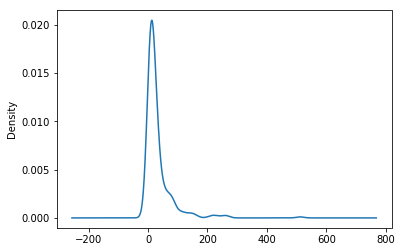

In [21]:
df["Fare"].plot(kind = "kde")

In [17]:
df = df.dropna(subset = ["Survived"])

In [18]:
df.isnull().sum()

Age            177
Cabin          687
Embarked         2
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
dtype: int64

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


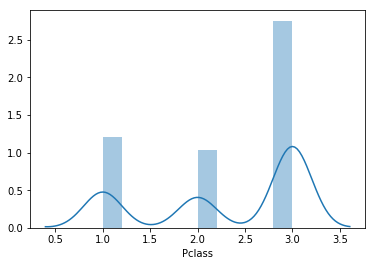

In [26]:
sns.distplot(a=df.Pclass)

In [36]:
X = pd.get_dummies(X)

In [46]:
X["Fare_catagory"] = pd.qcut(X.Fare,q = 5,labels = False)

In [49]:
X= X.drop("Fare",axis =1)

In [55]:
X =  X.fillna(X.mean())

In [29]:
from sklearn.naive_bayes import BernoulliNB

In [30]:
model = BernoulliNB()

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

In [60]:
model.fit(X_train,Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [58]:
X.dtypes

Age              float64
Parch              int64
Pclass             int64
SibSp              int64
Sex_female         uint8
Sex_male           uint8
Fare_catagory      int64
dtype: object

In [57]:
X.head()

,Age,Parch,Pclass,SibSp,Sex_female,Sex_male,Fare_catagory
0,22.0,0,3,1,0,1,0
1,38.0,0,1,1,1,0,4
2,26.0,0,3,0,1,0,1
3,35.0,0,1,1,1,0,4
4,35.0,0,3,0,0,1,1


In [56]:
X.isnull().sum()

Age              0
Parch            0
Pclass           0
SibSp            0
Sex_female       0
Sex_male         0
Fare_catagory    0
dtype: int64

In [61]:
pre =  model.predict(X_test)

In [62]:
df = pd.DataFrame({"Actual":Y_test,"Predicted":pre})

In [63]:
df

,Actual,Predicted
303,1.0,1.0
178,0.0,0.0
751,1.0,0.0
316,1.0,1.0
122,0.0,0.0
272,1.0,1.0
764,0.0,0.0
217,0.0,0.0
88,1.0,1.0
21,1.0,0.0


In [64]:
model.score(X_test,Y_test)

0.770949720670391

In [65]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()

In [66]:
model1.fit(X_train,Y_train)

GaussianNB(priors=None)

In [67]:
pre1 = model.predict(X_test)

In [68]:
model1.score(X_test,Y_test)

0.7877094972067039

In [80]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()

In [82]:
model2.fit(X=X_train,y=Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [83]:
model2.predict(X_test)

array([1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0.])

In [84]:
model2.score(X_test,Y_test)

0.7653631284916201